In [35]:
import os
os.chdir('/Users/sophiaperides/Desktop/Thinkful')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
ess = pd.read_csv('ESSdata.csv')
print(ess.info())
ess.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 873.0+ KB
None


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


## Questions

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

3. Who reported watching more TV in 2012, men or women?

4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [37]:
# Creating dataframes for each country

es = ess[ess['cntry'] == 'ES'].sort_values(by=['year'])
se = ess[ess['cntry'] == 'SE'].sort_values(by=['year'])
ch = ess[ess['cntry'] == 'CH'].sort_values(by=['year']) 
no = ess[ess['cntry'] == 'NO'].sort_values(by=['year'])
cz = ess[ess['cntry'] == 'CZ'].sort_values(by=['year'])
de = ess[ess['cntry'] == 'DE'].sort_values(by=['year'])

# Creating lists of each country's trust values
es_trust = es.ppltrst
se_trust = se.ppltrst
ch_trust = ch.ppltrst
no_trust = no.ppltrst
cz_trust = cz.ppltrst
de_trust = de.ppltrst


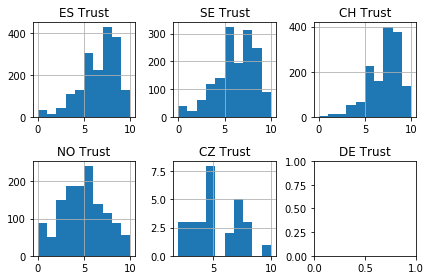

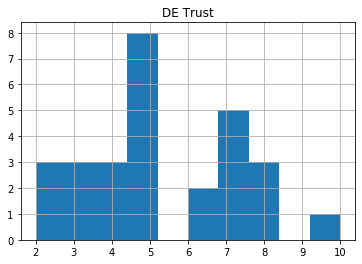

In [38]:
es_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 1)
plt.title('ES Trust')

se_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)

plt.subplot(2, 3, 2)
plt.title('SE Trust')

ch_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 3)
plt.title('CH Trust')

no_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 4)
plt.title('NO Trust')

cz_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 5)
plt.title('CZ Trust')

de_trust.hist()
plt.subplot(2, 3, 6)
plt.title('DE Trust')
plt.show()

de_trust.hist()
plt.title('DE Trust')
plt.show()

The data does not appear to have a distribution with mathematical properties, so I'll use the Kruskal-Wallis test to determine whether changes in trust were significant.

In [41]:
ess.year.value_counts()

7    4297
6    4297
Name: year, dtype: int64

In [59]:
def kruskal_comparison_test(df):
    df_2012 = df[df['year'] == 6] 
    df_2012_length = len(df_2012)
    df_2014 = df[df['year'] == 7]
    df_2014_length = len(df_2012)
    print(df_2012_length, df_2014_length)
    ranks = stats.rankdata(df_2012 + df_2014)
    
    # Create a new dataframe of ranks
    new_df = pd.DataFrame()
    new_df['Ranks_2012'] = ranks[0:df_2012_length]
    new_df['Ranks_2014'] = ranks[df_2012_length:]
                       
    # Average rank per group.
    groups = ['Ranks_2012', 'Ranks_2014']
    print(new_df[groups].apply(np.mean))

    # Overall average rank.
    print(np.mean(ranks))

    # Print the test statistic followed by the probability of getting this result
    # if the groups were not different.
    print(stats.kruskal(
        new_df['Ranks_2012'],
        new_df['Ranks_2014']))

In [60]:
kruskal_comparison_test(es)
print('\n')
kruskal_comparison_test(se)
print('\n')
kruskal_comparison_test(ch)
print('\n')
kruskal_comparison_test(no)
print('\n')
kruskal_comparison_test(cz)
print('\n')
kruskal_comparison_test(de)

1213 1213


ValueError: Length of values does not match length of index

In [51]:
es_2012 = es[es['year'] == 6]
es_2014 = es[es['year'] == 7]
ranks = stats.rankdata(es_2012 + es_2014)

# Create a new dataframe of ranks
new_es = pd.DataFrame()
new_es['Ranks_2012'] = ranks[0:4297]
new_es['Ranks_2014'] = ranks[4297:8594]
                       
# Average rank per group.
groups = ['Ranks_2012', 'Ranks_2014']
print(new_es[groups].apply(np.mean))

# Overall average rank.
print(np.mean(ranks))

# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
stats.kruskal(
    new_es['Ranks_2012'],
    new_es['Ranks_2014'])                  

Ranks_2012    21292.716081
Ranks_2014    19662.849430
dtype: float64
15769.5


KruskalResult(statistic=2111.859274680548, pvalue=0.0)

In [48]:
es_2012 = es[es['year'] == 6]
es_2014 = es[es['year'] == 7]
ranks = stats.rankdata(es_2012 + es_2014)

# Create a new dataframe of ranks
new_es = pd.DataFrame()
new_es['Ranks_2012'] = ranks[0:4297]
new_es['Ranks_2014'] = ranks[4297:8594]
                       
# Average rank per group.
groups = ['Ranks_2012', 'Ranks_2014']
print(new_es[groups].apply(np.mean))

# Overall average rank.
print(np.mean(ranks))

# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
stats.kruskal(
    new_es['Ranks_2012'],
    new_es['Ranks_2014'])                  

Ranks_2012    21292.716081
Ranks_2014    19662.849430
dtype: float64
15769.5


KruskalResult(statistic=2111.859274680548, pvalue=0.0)

In [ ]:
#